# Linear Regression

### First version creating a linear regression from screatch

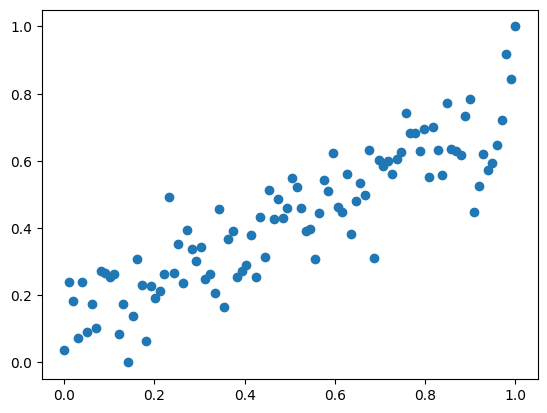

In [122]:
import torch
from torch import nn
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create the artificial data
X = torch.linspace(0, 100, 100)
noise = torch.tensor(np.random.normal(0, 25, 100), dtype=torch.float32)
y = 1.5 * X + 1.0 + noise

# Normalize the input data
X = (X - X.min()) /(X.max() - X.min())
y = (y - y.min()) /(y.max() - y.min())

# Separete the dataset on train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the data's graphic
plt.scatter(X, y)

### Building a model with PyTorch

In [123]:
# Model
class LR(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    
    # prediction
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

# Instanciating the model
model_0 = LR()

### Training and testing

In [124]:
# setup a loss function
loss_fn = nn.MSELoss()

# setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

# training loop
epochs = 1500
for epoch in range(epochs):
    # set the model to training mode (all parameters will be set to requires gradients)
    model_0.train() 

    # 1. Make the prediction
    pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(pred, y_train)

    # 3. Turn the gradient to zero
    optimizer.zero_grad()

    # 4. Calculate the gradient
    loss.backward()

    # 5. Update the parameters according to the gradient
    optimizer.step()

### Comparing the results with ScikitLearn

In [125]:
# ScikitLearn model
model_1 = LinearRegression()
model_1.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
print(f'ScikitLearn\nw: {float(model_1.coef_[0])},   b: {float(model_1.intercept_)}')

# Pytorch
print(f'\nPytorch\nw: {float(list(model_0.parameters())[0])},   b: {float(list(model_0.parameters())[1])}')

ScikitLearn
w: 0.6350376009941101,   b: 0.12010732293128967

Pytorch
w: 0.6350356340408325,   b: 0.12010832875967026
